In [2]:
%config ZMQInteractiveShell.ast_node_interactivity="all"

In [ ]:
class sklearn.svm.SVC (C=1.0, 
                       kernel=’rbf’, 
                       degree=3, 
                       gamma=’auto_deprecated’, 
                       coef0=0.0, 
                       shrinking=True, 
                       probability=False, 
                       tol=0.001, cache_size=200,
                       class_weight=None, 
                       verbose=False, 
                       max_iter=-1, 
                       decision_function_shape=’ovr’, 
                       random_state=None) 

In [54]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

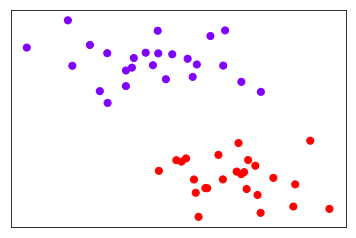

In [5]:
X,y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.xticks([])
plt.yticks([])
plt.show()

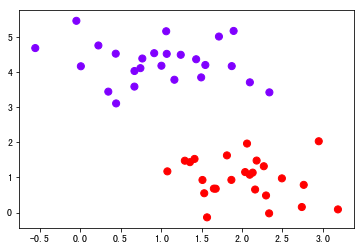

In [6]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca()

array([[1, 2, 3],
       [1, 2, 3]])

array([[7, 7, 7],
       [8, 8, 8]])

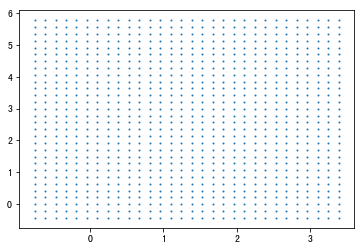

In [16]:
xlim = ax.get_xlim() 
ylim = ax.get_ylim() 
#type(xlim) #tuple
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)

axisy,axisx = np.meshgrid(axisy,axisx)

xy = np.vstack([axisx.ravel(),axisy.ravel()]).T

plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow")

a = np.array([1,2,3])
b = np.array([7,8])

v1,v2 = np.meshgrid(a,b)

v1
v2
v = np.vstack([v1.ravel(),v2.ravel()]).T

/jxy8/jxy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:29: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


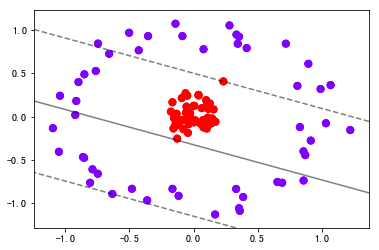

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30), value=30), IntSlider(value=30, de…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.86190799, -0.46655968],
       [-0.16500005,  0.16658048],
       [ 0.07763566,  0.77968929],
       [ 0.34434719,  0.84292346],
       [ 0.8572378 , -0.73795996],
       [ 0.11650668, -0.04499731],
       [-0.03297661,  0.03054423],
       [-0.15672489, -0.13690694],
       [ 0.14398598, -0.02105566],
       [ 0.16766018, -1.13056394],
       [-0.1766534 ,  0.0579995 ],
       [-0.63315466, -0.89356927],
       [ 0.27977726,  1.05495041],
       [-1.0496416 , -0.40602905],
       [-0.04415331, -0.187198  ],
       [ 0.06375157,  0.09823042],
       [-0.14119647,  1.07465057],
       [ 0.91353826, -0.27634951],
       [-0.35461727,  0.93139138],
       [-0.03749857, -0.08651919],
       [-0.8511241 ,  0.48981945],
       [ 0.05485839, -0.08068917],
       [ 0.00290975, -0.06593319],
       [-0.07917171, -0.14512552],
       [ 0.11472499,  0.08972817],
       [-0.92217057,  0.01975234],
       [-0.15253747, -0.01717157],
       [

In [55]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

X, y = make_circles(100, factor = 0.1, noise = .1)
plt.scatter(X[: , 0], X[: , 1], c = y, s = 50, cmap = "rainbow")

def plot_svc_decision_function(model, ax = None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P, colors = "k", levels = [-1, 0, 1], alpha = 0.5, linestyles = ["--", "-", "--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

clf = SVC(kernel = "linear").fit(X, y)
plt.scatter(X[: , 0], X[: , 1], c = y, s = 50, cmap = "rainbow")
plot_svc_decision_function(clf)

r = np.exp(-(X ** 2).sum(1))

rlim = np.linspace(min(r), max(r), 0.2)

from mpl_toolkits import mplot3d

def plot_3D(elev = 30, azim = 30, X = X, y = y):
    ax = plt.subplot(projection = "3d")
    ax.scatter3D(X[: , 0], X[: , 1], r, c = y, s = 50, cmap = 'rainbow')
    ax.view_init(elev = elev, azim = azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()

from ipywidgets import interact, fixed
interact(plot_3D, elev = [0, 30], azip = (-180, 180), X = fixed(X), y = fixed(y))
plt.show()

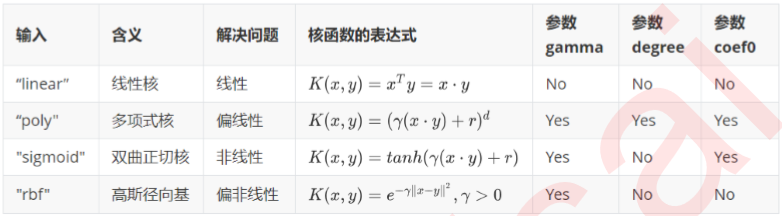

rbf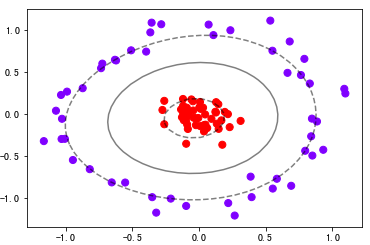

poly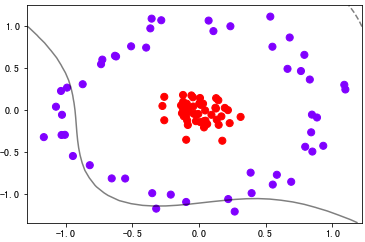

sigmoid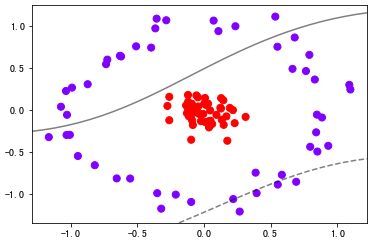

/jxy8/jxy/.local/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


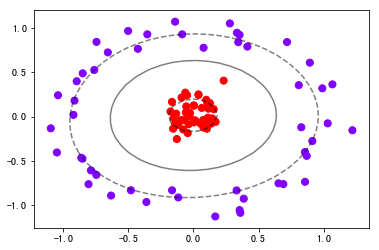

In [56]:
clf = SVC(kernel="rbf").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

# 探究核函数

In [57]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 
from sklearn import svm 
from sklearn.datasets import make_circles, make_moons, make_blobs,make_classification

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

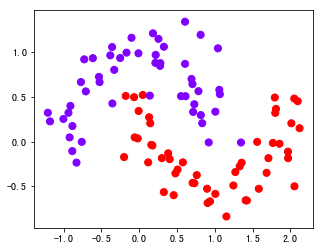

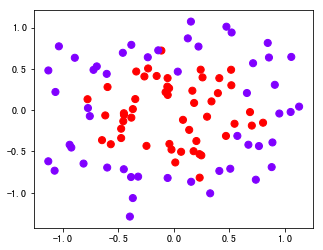

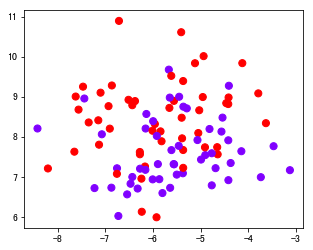

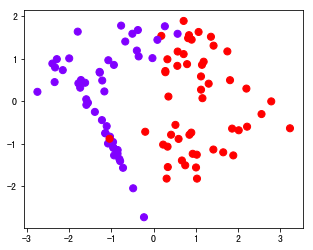

In [58]:
n_samples = 100

datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),
    make_classification(n_samples=n_samples,n_features = 2,n_informative=2,n_redundant=0, random_state=5)
]

Kernel = ['linear','poly','sigmoid','rbf']
for X,y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")

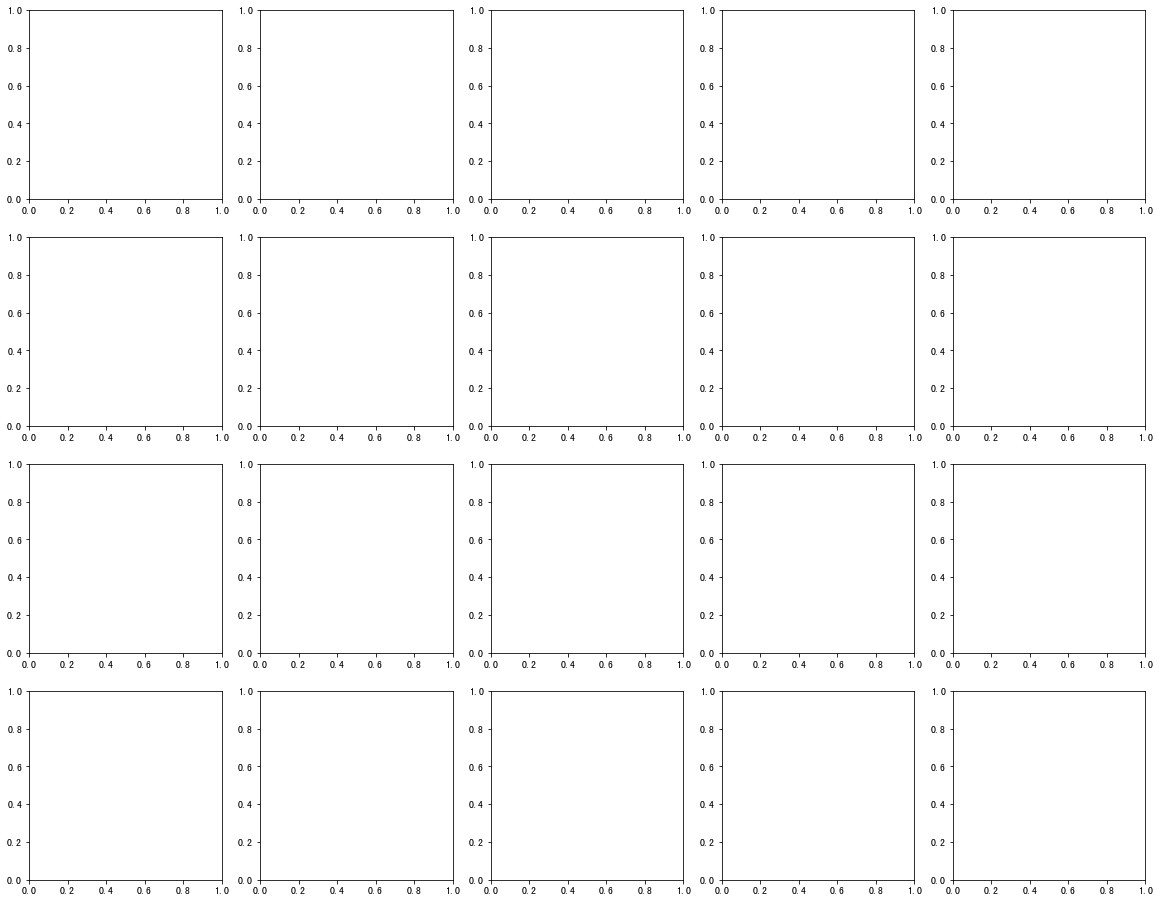

In [51]:
nrows = len(datasets)
ncols = len(Kernel) + 1
fig ,axes = plt.subplots(nrows,ncols,figsize=(20,16))

Text(0.5, 1.0, 'Input data')

[]

[]

[]

[]

Text(0.5, 1.0, 'linear')

Text(0.95, 0.06, '.88')

[]

[]

Text(0.5, 1.0, 'poly')

Text(0.95, 0.06, '.91')

[]

[]

Text(0.5, 1.0, 'sigmoid')

Text(0.95, 0.06, '.66')

[]

[]

Text(0.5, 1.0, 'rbf')

Text(0.95, 0.06, '.98')

[]

[]

[]

[]

Text(0.95, 0.06, '.57')

[]

[]

Text(0.95, 0.06, '.59')

[]

[]

Text(0.95, 0.06, '.61')

[]

[]

Text(0.95, 0.06, '.92')

[]

[]

[]

[]

Text(0.95, 0.06, '.69')

[]

[]

Text(0.95, 0.06, '.70')

/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


[]

[]

Text(0.95, 0.06, '.50')

[]

[]

Text(0.95, 0.06, '.78')

[]

[]

[]

[]

Text(0.95, 0.06, '.95')

[]

[]

Text(0.95, 0.06, '.95')

[]

[]

Text(0.95, 0.06, '.81')

[]

[]

Text(0.95, 0.06, '.97')

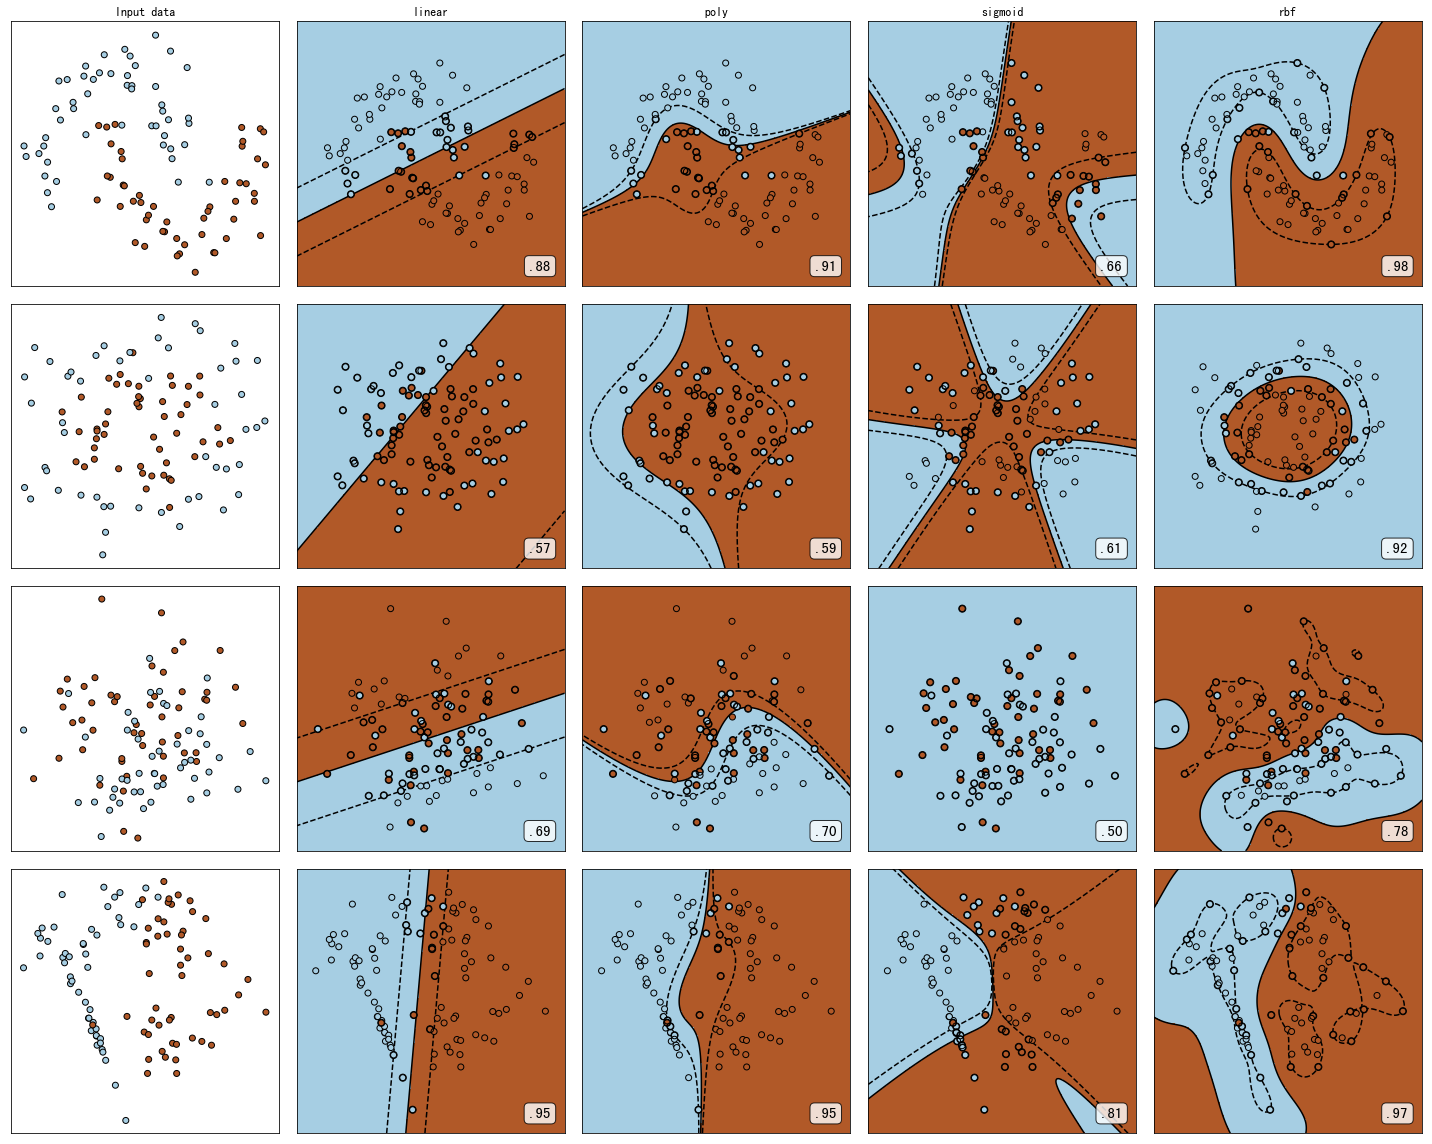

In [59]:
nrows=len(datasets)
ncols=len(Kernel) + 1
 
fig, axes = plt.subplots(nrows, ncols,figsize=(20,16))

#第一层循环：在不同的数据集中循环
for ds_cnt, (X,Y) in enumerate(datasets):
    
    #在图像中的第一列，放置原数据的分布
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    
    #第二层循环：在不同的核函数中循环
    #从图像的第二列开始，一个个填充分类结果
    for est_idx, kernel in enumerate(Kernel):
        
        #定义子图位置
        ax = axes[ds_cnt, est_idx + 1]
        
        #建模
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)
        
        #绘制图像本身分布的散点图
        ax.scatter(X[:, 0], X[:, 1], c=Y
                   ,zorder=10
                   ,cmap=plt.cm.Paired,edgecolors='k')
        #绘制支持向量
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
                    facecolors='none', zorder=10, edgecolors='k')# facecolors='none':透明的
        
        #绘制决策边界
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        
        #np.mgrid，合并了我们之前使用的np.linspace和np.meshgrid的用法
        #一次性使用最大值和最小值来生成网格
        #表示为[起始值：结束值：步长]
        #如果步长是复数，则其整数部分就是起始值和结束值之间创建的点的数量，并且结束值被包含在内
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        #np.c_，类似于np.vstack的功能
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #填充等高线不同区域的颜色
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        #绘制等高线
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-1, 0, 1])
        
        #设定坐标轴为不显示
        ax.set_xticks(())
        ax.set_yticks(())
        
        #将标题放在第一行的顶上
        if ds_cnt == 0:
            ax.set_title(kernel)
            
        #为每张图添加分类的分数   
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0')
                , size=15
                , bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
                    #为分数添加一个白色的格子作为底色
                , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                , horizontalalignment='right' #位于坐标轴的什么方向
               )
 
plt.tight_layout()
plt.show()

1. 线性核，尤其是多项式核函数在高次项时计算非常缓慢 
2. rbf和多项式核函数都不擅长处理量纲不统一的数据集

幸运的是，这两个缺点都可以由数据无量纲化来解决。因此，SVM执行之前，非常推荐先进行数据的无量纲化！

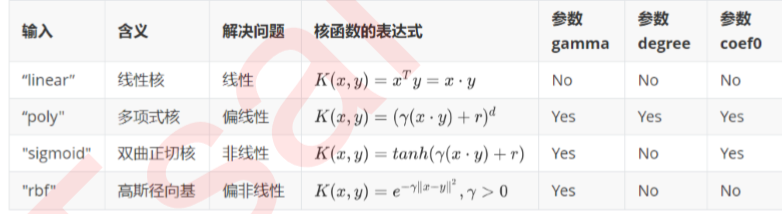

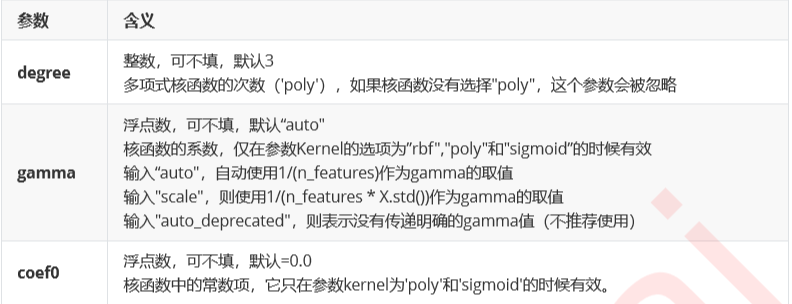